<a href="https://colab.research.google.com/github/FilipeSCampos/Data_restore_scrapping/blob/main/Trabalho_Web_Scrapping_falho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from time import sleep
from datetime import datetime, timedelta

def extract_product_data(url, product_name):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    price_div = soup.find('div', class_='ui-pdp-price__main-container')
    price = price_div.text.strip() if price_div else 'N/A'
    print(f"Preço do produto '{product_name}': {price}")
    return pd.DataFrame({'Date': pd.Timestamp.now(), 'Price': price, 'Product': product_name}, index=[0])

def scrape_product_prices_for_three_years(urls):
    final_df = pd.DataFrame()
    current_date = datetime.now()
    three_years_ago = current_date - timedelta(days=3)

    for product_name, url in urls.items():
        while current_date >= three_years_ago:
            formatted_date = current_date.strftime("%Y-%m-%d")
            # Modificar a URL para incluir a data no formato correto
            url_with_date = f"{url}?date={formatted_date}"

            try:
                product_data = extract_product_data(url_with_date, product_name)
                final_df = pd.concat([final_df, product_data], ignore_index=True)
                sleep(1)
            except Exception as e:
                print(f"Erro ao processar o produto '{product_name}': {e}")

            current_date -= timedelta(days=1)  # Atualizar a data para o dia anterior

    return final_df




url_apple = {'iphone': 'https://www.mercadolivre.com.br/apple-iphone-12-128-gb-branco-distribuidor-autorizado/p/MLB1016163652?pdp_filters=category:MLB1055#searchVariation=MLB1016163652&position=2&search_layout=stack&type=product&tracking_id=61c80a35-0934-4355-b16e-74187910e272'}
url_samsung = {'Samsung Galaxy S20 FE': 'https://www.mercadolivre.com.br/smartphone-samsung-galaxy-s20-fe-tl-65-128gb-6gb-ram-branco/p/MLB16211325?pdp_filters=category:MLB1055#searchVariation=MLB16211325&position=2&search_layout=stack&type=product&tracking_id=f2650b81-90bc-4d0d-aa73-b2bf00b96af0'}
url_xiaomi = {'Xiaomi Redmi 12': 'https://www.mercadolivre.com.br/xiaomi-redmi-12-dual-sim-128-gb-polar-silver-8-gb-ram/p/MLB24213584?pdp_filters=category:MLB1055#searchVariation=MLB24213584&position=1&search_layout=stack&type=product&tracking_id=e69a515d-96e0-469b-bb30-0fb7aab3cc52'}
# Extrair dados para o Samsung Galaxy S20 FE

iphone_df = scrape_product_prices_for_three_years({'iphone' : url_apple['iphone']})


Preço do produto 'iphone': R$3.999R$3.134,0521% OFFno Pixou R$3.299 em 10x R$329,90 sem juros
Preço do produto 'iphone': R$3.999R$3.134,0521% OFFno Pixou R$3.299 em 10x R$329,90 sem juros
Preço do produto 'iphone': R$3.999R$3.134,0521% OFFno Pixou R$3.299 em 10x R$329,90 sem juros
Preço do produto 'iphone': R$3.999R$3.134,0521% OFFno Pixou R$3.299 em 10x R$329,90 sem juros


In [96]:
xiaomi_df = scrape_product_prices_for_three_years({'Xiaomi Redmi 12': url_xiaomi['Xiaomi Redmi 12']})

Preço do produto 'Xiaomi Redmi 12': N/A
Preço do produto 'Xiaomi Redmi 12': N/A
Preço do produto 'Xiaomi Redmi 12': N/A
Preço do produto 'Xiaomi Redmi 12': N/A


In [77]:
samsung_df = scrape_product_prices_for_three_years({'Samsung Galaxy S20 FE': url_samsung['Samsung Galaxy S20 FE']})


Preço do produto 'Samsung Galaxy S20 FE': R$2.699
Preço do produto 'Samsung Galaxy S20 FE': R$2.699
Preço do produto 'Samsung Galaxy S20 FE': R$2.699
Preço do produto 'Samsung Galaxy S20 FE': R$2.699em 12x R$261,67
Preço do produto 'Samsung Galaxy S20 FE': R$2.699em 12x R$261,67
Preço do produto 'Samsung Galaxy S20 FE': R$2.699
Preço do produto 'Samsung Galaxy S20 FE': R$2.699
Preço do produto 'Samsung Galaxy S20 FE': R$2.699
Preço do produto 'Samsung Galaxy S20 FE': R$2.699
Preço do produto 'Samsung Galaxy S20 FE': R$2.699
Preço do produto 'Samsung Galaxy S20 FE': R$2.699
Preço do produto 'Samsung Galaxy S20 FE': R$2.699em 12x R$261,67
Preço do produto 'Samsung Galaxy S20 FE': R$2.699
Preço do produto 'Samsung Galaxy S20 FE': R$2.699
Preço do produto 'Samsung Galaxy S20 FE': R$2.699
Preço do produto 'Samsung Galaxy S20 FE': R$2.699
Preço do produto 'Samsung Galaxy S20 FE': R$2.699
Preço do produto 'Samsung Galaxy S20 FE': R$2.699
Preço do produto 'Samsung Galaxy S20 FE': R$2.699
Preço

In [102]:
iphone_df

,Date,Price,Product
0,2024-04-29 23:26:01.228664,"R$3.999R$3.134,0521% OFFno Pixou R$3.299 em 10...",iphone
1,2024-04-29 23:26:03.125602,"R$3.999R$3.134,0521% OFFno Pixou R$3.299 em 10...",iphone
2,2024-04-29 23:26:04.964146,"R$3.999R$3.134,0521% OFFno Pixou R$3.299 em 10...",iphone
3,2024-04-29 23:26:06.920583,"R$3.999R$3.134,0521% OFFno Pixou R$3.299 em 10...",iphone


In [28]:
import pandas as pd
import re

# Função para extrair preço completo, preço com desconto e preço a prazo no cartão
def extract_prices(price_str):
    # Inicializa os valores como None
    full_price = None
    discount_price = None
    discount_percentage = None
    credit_price = None

    # Expressão regular para encontrar o padrão de preço completo
    full_price_pattern = r'R\$(\d[\d,\.]*)'
    full_price_match = re.search(full_price_pattern, price_str)

    # Se houver correspondência com o padrão de preço completo
    if full_price_match:
        full_price = float(full_price_match.group(1).replace('.', '').replace(',', '.'))

    # Expressão regular para encontrar o padrão de preço com desconto
    discount_pattern = r'R\$\d[\d,\.]*\d{2}(\d{2})% OFF'
    discount_match = re.search(discount_pattern, price_str)

    # Se houver correspondência com o padrão de preço com desconto
    if discount_match:
        discount_percentage = int(discount_match.group(1))
        if full_price:
            discount_price = full_price - (full_price * discount_percentage / 100)

    # Expressão regular para encontrar o padrão de preço a prazo no cartão
    credit_pattern = r'R\$(\d[\d,\.]*) em (\d+)'
    credit_match = re.search(credit_pattern, price_str)

    # Se houver correspondência com o padrão de preço a prazo no cartão
    if credit_match:
        credit_price = float(credit_match.group(1).replace('.', '').replace(',', '.'))

    # Retorna os preços completo, com desconto e a prazo no cartão, e a porcentagem de desconto
    return full_price, discount_price, discount_percentage, credit_price



# Aplica a função extract_prices para cada linha do DataFrame
final_df['Full Price'], final_df['Discount Price'], final_df['Discount Percentage'], final_df['Credit Price'] = zip(*final_df['Price'].apply(extract_prices))

# Atribuir nomes aos produtos
final_df.loc[final_df['Product'] == 'Product 1', 'Product'] = 'iPhone'
final_df.loc[final_df['Product'] == 'Product 2', 'Product'] = 'Samsung Galaxy S20 FE'
final_df.loc[final_df['Product'] == 'Product 3', 'Product'] = 'Xiaomi Redmi 12'

# Mostra o DataFrame resultante
final_df


,Date,Price,Product,Full Price,Discount Price,Discount Percentage,Credit Price
0,2024-04-29,"R$3.999R$3.134,0521% OFFno Pixou R$3.299 em 10...",iPhone,3999.0,3159.21,21.0,3299.0
1,2024-04-28,"R$3.999R$3.134,0521% OFFno Pixou R$3.299 em 10...",iPhone,3999.0,3159.21,21.0,3299.0
2,2024-04-27,"R$3.999R$3.134,0521% OFFno Pix",iPhone,3999.0,3159.21,21.0,NaN
3,2024-04-26,"R$3.999R$3.134,0521% OFFno Pix",iPhone,3999.0,3159.21,21.0,NaN
4,2024-04-25,"R$3.999R$3.134,0521% OFFno Pixou R$3.299 em 10...",iPhone,3999.0,3159.21,21.0,3299.0
...,...,...,...,...,...,...,...
3283,2021-05-04,N/A,Xiaomi Redmi 12,NaN,NaN,NaN,NaN
3284,2021-05-03,N/A,Xiaomi Redmi 12,NaN,NaN,NaN,NaN
3285,2021-05-02,N/A,Xiaomi Redmi 12,NaN,NaN,NaN,NaN
3286,2021-05-01,N/A,Xiaomi Redmi 12,NaN,NaN,NaN,NaN


In [34]:
# Filtrar o dataframe para cada marca
iphone_data = final_df[final_df['Product'] == 'iPhone']
samsung_data = final_df[final_df['Product'] == 'Samsung Galaxy S20 FE']
xiaomi_data = final_df[final_df['Product'] == 'Xiaomi Redmi 12']

# Visualizar os valores para cada marca
print("Dados do iPhone:")
print(iphone_data)

print("\nDados do Samsung Galaxy S20 FE:")
print(samsung_data)

print("\nDados do Xiaomi Redmi 12:")
print(xiaomi_data)


Dados do iPhone:
           Date                                              Price Product  \
1095 2021-04-30                                                N/A  iPhone   
1094 2021-05-01                                                N/A  iPhone   
1093 2021-05-02                                                N/A  iPhone   
1092 2021-05-03                                                N/A  iPhone   
1091 2021-05-04                                                N/A  iPhone   
...         ...                                                ...     ...   
4    2024-04-25  R$3.999R$3.134,0521% OFFno Pixou R$3.299 em 10...  iPhone   
3    2024-04-26                     R$3.999R$3.134,0521% OFFno Pix  iPhone   
2    2024-04-27                     R$3.999R$3.134,0521% OFFno Pix  iPhone   
1    2024-04-28  R$3.999R$3.134,0521% OFFno Pixou R$3.299 em 10...  iPhone   
0    2024-04-29  R$3.999R$3.134,0521% OFFno Pixou R$3.299 em 10...  iPhone   

      Full Price  Discount Price  Discount Per

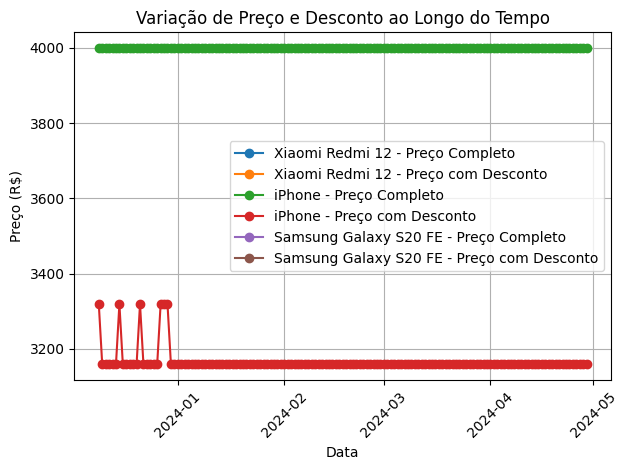

In [31]:
import matplotlib.pyplot as plt

# Converter a coluna 'Date' para tipo datetime
final_df['Date'] = pd.to_datetime(final_df['Date'])

# Ordenar o DataFrame pela coluna 'Date'
final_df = final_df.sort_values(by='Date')

# Criar gráficos de linha para cada produto
for product_name in final_df['Product'].unique():
    product_data = final_df[final_df['Product'] == product_name]
    plt.plot(product_data['Date'], product_data['Full Price'], marker='o', linestyle='-', label=f'{product_name} - Preço Completo')
    plt.plot(product_data['Date'], product_data['Discount Price'], marker='o', linestyle='-', label=f'{product_name} - Preço com Desconto')

plt.title('Variação de Preço e Desconto ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Preço (R$)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


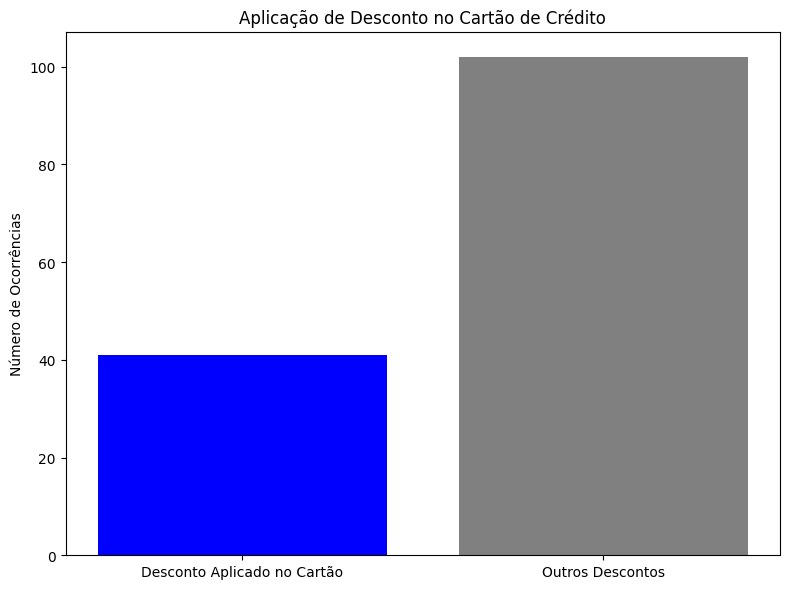

In [32]:
import matplotlib.pyplot as plt

# Contar o número de ocorrências de descontos aplicados no cartão de crédito
discount_applied_count = final_df['Credit Price'].count()

# Contar o número total de ocorrências de descontos
total_discount_count = final_df['Discount Price'].count()

# Criar um gráfico de barras para mostrar a distribuição dos descontos
plt.figure(figsize=(8, 6))
plt.bar(['Desconto Aplicado no Cartão', 'Outros Descontos'], [discount_applied_count, total_discount_count - discount_applied_count], color=['blue', 'gray'])
plt.title('Aplicação de Desconto no Cartão de Crédito')
plt.ylabel('Número de Ocorrências')
plt.tight_layout()
plt.show()


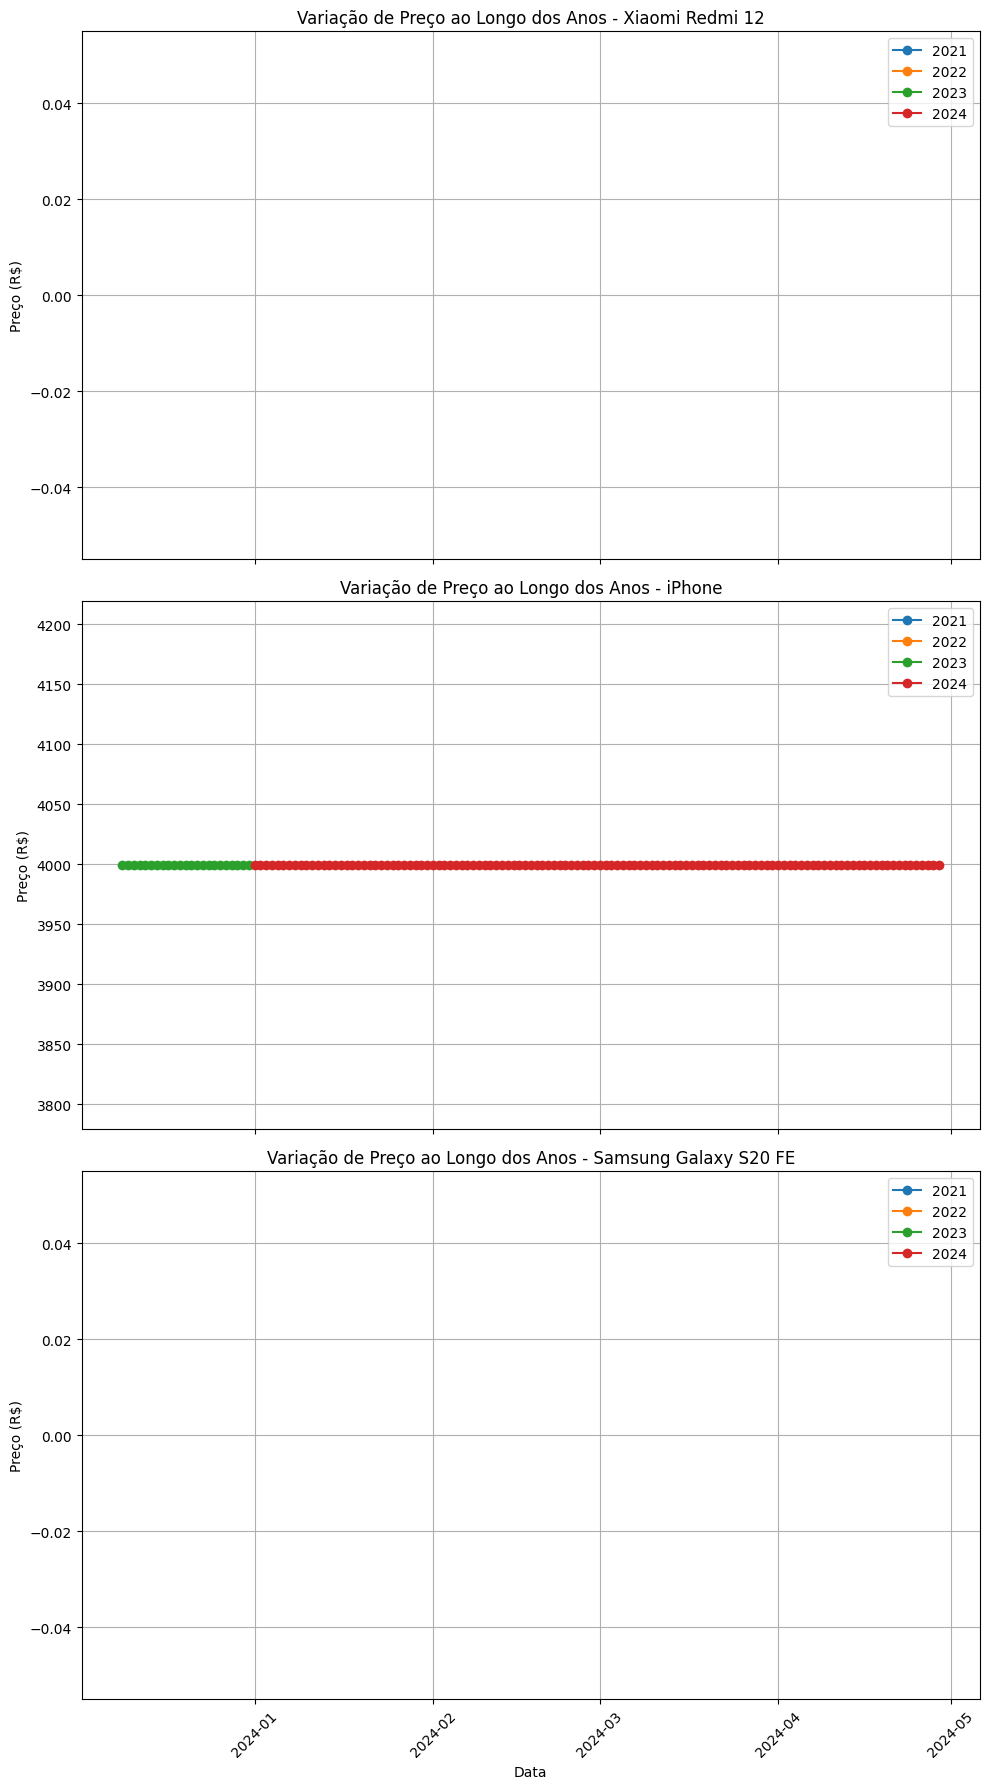

In [33]:
import matplotlib.pyplot as plt

# Converter a coluna 'Date' para tipo datetime
final_df['Date'] = pd.to_datetime(final_df['Date'])

# Extrair o ano de cada data
final_df['Year'] = final_df['Date'].dt.year

# Criar uma figura e eixos separados para cada produto
fig, axs = plt.subplots(nrows=len(final_df['Product'].unique()), ncols=1, figsize=(10, 6 * len(final_df['Product'].unique())), sharex=True)

# Loop sobre cada produto e criar uma série temporal por ano
for i, product_name in enumerate(final_df['Product'].unique()):
    product_data = final_df[final_df['Product'] == product_name]
    ax = axs[i] if len(final_df['Product'].unique()) > 1 else axs
    for year in product_data['Year'].unique():
        year_data = product_data[product_data['Year'] == year]
        ax.plot(year_data['Date'], year_data['Full Price'], marker='o', linestyle='-', label=f'{year}')

    ax.set_title(f'Variação de Preço ao Longo dos Anos - {product_name}')
    ax.set_ylabel('Preço (R$)')
    ax.legend()
    ax.grid(True)

plt.xlabel('Data')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
